# 4.10.1 Import the data set you exported in Exercise 4.9

In [8]:
# Import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [9]:
pd.options.display.max_rows = None
pd.options.display.max_columns = None

In [10]:
# Import the pickle file from previous exercise
path = r'/Users/elvachen/Documents/DA Learning/Immersion-data resources'
df_ods_prds_cust = pd.read_pickle(os.path.join(path, 'prepared data', 'ods_prds_cust_49.pkl'))
df_ods_prds_cust.head()

,order_id,user_id,order_sequency,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,avg_price,spending_flag,median_days_s_p_ods,frequency_flag,first_name,last_name,gender,state,age,date_joined,n_dependants,fam_status,income
0,2539329,1,1,2,8,NaN,196,1,0,Soda,77,7,9.0,Mid-range product,Regularly busy,Regular day,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
1,2398795,1,2,3,7,15.0,196,1,1,Soda,77,7,9.0,Mid-range product,Regularly busy,Second lowest day,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
2,473747,1,3,3,12,21.0,196,1,1,Soda,77,7,9.0,Mid-range product,Regularly busy,Second lowest day,Most orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
3,2254736,1,4,4,7,29.0,196,1,1,Soda,77,7,9.0,Mid-range product,Least busy,First lowest day,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
4,431534,1,5,4,15,28.0,196,1,1,Soda,77,7,9.0,Mid-range product,Least busy,First lowest day,Most orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423


# 4.10.2 Consider any security implications that might exist for this new data

Customer information that contains names, gender, age, number of dependants, marriage status and income in the dataframe is considered as PII data.

# 4.10.3

## 4.10.3.1 Use the region information in this Wikipedia article to create your column

In [11]:
# Double check the format of 'state'
df_ods_prds_cust['state'].value_counts(dropna= False)

Pennsylvania            667082
California              659783
Rhode Island            656913
Georgia                 656389
New Mexico              654494
Arizona                 653964
North Carolina          651900
Oklahoma                651739
Alaska                  648495
Minnesota               647825
Massachusetts           646358
Wyoming                 644255
Virginia                641421
Missouri                640732
Texas                   640394
Colorado                639280
Maine                   638583
North Dakota            638491
Alabama                 638003
Kansas                  637538
Louisiana               637482
Delaware                637024
South Carolina          636754
Oregon                  636425
Arkansas                636144
Nevada                  636139
New York                635983
Montana                 635265
South Dakota            633772
Illinois                633024
Hawaii                  632901
Washington              632852
Mississi

In [12]:
# Create an object to contain a list of regions related to states in the dataframe
regions = []

for value in df_ods_prds_cust['state']:
    if value in ('Maine', 'New Hampshire', 'Vermont', 'Massachusetts', 'Rhode Island', 'Connecticut', 'New York', 'Pennsylvania', 'New Jersey'):
        regions.append('Northeast')
    elif value in ('Wisconsin', 'Michigan', 'Illinois', 'Indiana', 'Ohio', 'North Dakota', 'South Dakota','Nebraska','Kansas', 'Minnesota', 'Iowa','Missouri'):
        regions.append('Midwest')
    elif value in ('Delaware', 'Maryland','District of Columbia','Virginia','West Virginia','North Carolina','South Carolina','Georgia','Florida','Kentucky','Tennessee','Mississippi','Alabama','Oklahoma','Texas','Arkansas','Louisiana'):
        regions.append('South')
    else:
        regions.append('West')

In [13]:
# Create a new column to contain the 'region' list
df_ods_prds_cust['region'] = regions
df_ods_prds_cust['region'].value_counts(dropna= False)

South        10791885
West          8292913
Midwest       7597325
Northeast     5722736
Name: region, dtype: int64

## 4.10.3.2 Determine whether there’s a difference in spending habits between the different U.S. regions

In [14]:
# Drop duplicated customers and export the new dataframe contained unique customers
df_unique_cust=df_ods_prds_cust.drop_duplicates(subset=['user_id'])
df_unique_cust.to_pickle(os.path.join(path, 'Prepared Data', 'unique_customer_410.pkl'))

In [15]:
# Create a crosstab to indicate the proportion of high spender in different regions
ct_spender_region = pd.crosstab(df_unique_cust['region'], df_unique_cust['spending_flag'], dropna = False)
ct_spender_region['High spender proportion']=ct_spender_region['High spender']/(ct_spender_region['High spender']+ct_spender_region['Low spender'])
ct_spender_region

spending_flag,High spender,Low spender,High spender proportion
region,,,
Midwest,1263,47256,0.026031
Northeast,883,35505,0.024266
South,1817,66920,0.026434
West,1394,51171,0.026520


According to above result, as the proportions of high spender in different regions are around  2.4% - 2.6%, so there is no significant difference in spending habits between different regions in US.

## 4.10.4 Create an exclusion flag for low-activity customers (customers with less than 5 orders) 

In [16]:
# Create a new dataframe to exclude the customers who ordered less than 5 times
df_5more_ods=df_ods_prds_cust[df_ods_prds_cust['max_order']>=5]
df_5more_ods.head()

,order_id,user_id,order_sequency,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,avg_price,spending_flag,median_days_s_p_ods,frequency_flag,first_name,last_name,gender,state,age,date_joined,n_dependants,fam_status,income,region
0,2539329,1,1,2,8,NaN,196,1,0,Soda,77,7,9.0,Mid-range product,Regularly busy,Regular day,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South
1,2398795,1,2,3,7,15.0,196,1,1,Soda,77,7,9.0,Mid-range product,Regularly busy,Second lowest day,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South
2,473747,1,3,3,12,21.0,196,1,1,Soda,77,7,9.0,Mid-range product,Regularly busy,Second lowest day,Most orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South
3,2254736,1,4,4,7,29.0,196,1,1,Soda,77,7,9.0,Mid-range product,Least busy,First lowest day,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South
4,431534,1,5,4,15,28.0,196,1,1,Soda,77,7,9.0,Mid-range product,Least busy,First lowest day,Most orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South


In [17]:
# Export the new dataframe to pickle file
df_5more_ods.to_pickle(os.path.join(path, 'Prepared Data', '5more_ods_410.pkl'))

# 4.10.5 Create a profiling variable based on age, income, certain goods in the “department_id” column, and number of dependents. 

In [18]:
# Setup display list
pd.options.display.max_columns = None

## Create "age_group" column

In [19]:
# Create 'age_group' column
age_group= []

for value in df_ods_prds_cust['age']:
    if value <25:
        age_group.append('less than 25')
    elif value <35:
        age_group.append('25-34')
    elif value <45:
        age_group.append('35-44')
    elif value <55:
        age_group.append('45-54')
    elif value <65:
        age_group.append('55-64')
    else:
        age_group.append('65+')
df_ods_prds_cust['age_group']=age_group

In [20]:
# Check "age_group" distribution
df_ods_prds_cust['age_group'].value_counts(dropna=False)

65+             8575084
45-54           5111126
35-44           5062429
25-34           5054654
55-64           5028565
less than 25    3573001
Name: age_group, dtype: int64

## Create "income_level" column to divide incomes in different tiers

In [21]:
# Divide "income" to different tiers
df_ods_prds_cust.loc[df_ods_prds_cust['income']< 30000, 'income_level'] = 'Low income'

In [22]:
df_ods_prds_cust.loc[(df_ods_prds_cust['income']>= 30000) & (df_ods_prds_cust['income']< 50000), 'income_level'] = 'Limited income'

In [23]:
df_ods_prds_cust.loc[(df_ods_prds_cust['income']>= 50000) & (df_ods_prds_cust['income']< 140000), 'income_level'] = 'Lower-middle income'

In [24]:
df_ods_prds_cust.loc[(df_ods_prds_cust['income']>= 140000) & (df_ods_prds_cust['income']< 200000), 'income_level'] = 'Upper-middle income'

In [25]:
df_ods_prds_cust.loc[df_ods_prds_cust['income']>= 200000, 'income_level'] = 'High income'

In [26]:
# Check "income_level" distribution
df_ods_prds_cust['income_level'].value_counts(dropna = False)

Lower-middle income    22934735
Upper-middle income     5617598
Limited income          3386996
High income              258443
Low income               207087
Name: income_level, dtype: int64

## Create a variable to combine family status with number of dependants

In [27]:
# Create a crosstab te see how family status combines with number of dependants
ct_fam_dpd = pd.crosstab(df_ods_prds_cust['fam_status'],df_ods_prds_cust['n_dependants'] ,dropna = False)
ct_fam_dpd

n_dependants,0,1,2,3
fam_status,,,,
divorced/widowed,2771812,0,0,0
living with parents and siblings,0,530200,507963,512440
married,0,7550904,7583180,7622669
single,5325691,0,0,0


In [28]:
# Create "family" to tag marrital status and having children or not
df_ods_prds_cust.loc[(df_ods_prds_cust['fam_status']=='divorced/widowed'), 'family'] = 'divorced/widowed without kids'

In [29]:
df_ods_prds_cust.loc[(df_ods_prds_cust['fam_status']=='living with parents and siblings'), 'family'] = 'single parent'

In [30]:
df_ods_prds_cust.loc[(df_ods_prds_cust['fam_status']=='married'), 'family'] = 'married with kids'

In [31]:
df_ods_prds_cust.loc[(df_ods_prds_cust['fam_status']=='single'), 'family'] = 'single'

In [32]:
# Check "family" distribution
df_ods_prds_cust['family'].value_counts(dropna = False)

married with kids                22756753
single                            5325691
divorced/widowed without kids     2771812
single parent                     1550603
Name: family, dtype: int64

In [33]:
# Review the updates of dataframe
df_ods_prds_cust.head()

,order_id,user_id,order_sequency,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,avg_price,spending_flag,median_days_s_p_ods,frequency_flag,first_name,last_name,gender,state,age,date_joined,n_dependants,fam_status,income,region,age_group,income_level,family
0,2539329,1,1,2,8,NaN,196,1,0,Soda,77,7,9.0,Mid-range product,Regularly busy,Regular day,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South,25-34,Limited income,married with kids
1,2398795,1,2,3,7,15.0,196,1,1,Soda,77,7,9.0,Mid-range product,Regularly busy,Second lowest day,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South,25-34,Limited income,married with kids
2,473747,1,3,3,12,21.0,196,1,1,Soda,77,7,9.0,Mid-range product,Regularly busy,Second lowest day,Most orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South,25-34,Limited income,married with kids
3,2254736,1,4,4,7,29.0,196,1,1,Soda,77,7,9.0,Mid-range product,Least busy,First lowest day,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South,25-34,Limited income,married with kids
4,431534,1,5,4,15,28.0,196,1,1,Soda,77,7,9.0,Mid-range product,Least busy,First lowest day,Most orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South,25-34,Limited income,married with kids


# 4.10.6 Create an appropriate visualization to show the distribution of profiles

In [34]:
# Create a new dataframe to make customers unique
df_unique_cust=df_ods_prds_cust.drop_duplicates(subset=['user_id'])
df_unique_cust.describe()

,order_id,user_id,order_sequency,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,aisle_id,department_id,prices,max_order,avg_price,median_days_s_p_ods,age,n_dependants,income
count,2.062090e+05,206209.000000,206209.000000,206209.000000,206209.000000,144418.000000,206209.000000,206209.000000,206209.0,206209.000000,206209.000000,206201.000000,206209.000000,206209.000000,206208.000000,206209.000000,206209.000000,206209.000000
mean,1.711404e+06,103105.000000,5.680290,2.742310,13.554661,15.367060,24777.913510,6.260968,0.0,46.529138,7.346968,7.809724,15.590256,12.550695,15.084674,49.501646,1.499823,94632.852548
std,9.893889e+05,59527.555167,8.443414,2.083334,4.230537,10.298847,14522.701911,5.623558,0.0,33.735754,5.636131,3.834223,16.654823,127.598959,9.074419,18.480962,1.118433,42473.786988
min,1.300000e+01,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,18.000000,0.000000,25903.000000
25%,8.521790e+05,51553.000000,1.000000,1.000000,10.000000,6.000000,13176.000000,2.000000,0.0,24.000000,4.000000,4.400000,5.000000,7.227778,7.000000,33.000000,0.000000,59874.000000
50%,1.714017e+06,103105.000000,3.000000,3.000000,14.000000,13.000000,21573.000000,5.000000,0.0,24.000000,4.000000,9.000000,9.000000,7.800000,13.000000,49.000000,1.000000,93547.000000
75%,2.567815e+06,154657.000000,6.000000,5.000000,17.000000,28.000000,38444.000000,8.000000,0.0,77.000000,11.000000,10.300000,19.000000,8.351636,22.000000,66.000000,3.000000,124244.000000
max,3.421062e+06,206209.000000,99.000000,6.000000,23.000000,30.000000,49683.000000,89.000000,0.0,134.000000,21.000000,25.000000,99.000000,25005.425000,30.000000,81.000000,3.000000,593901.000000


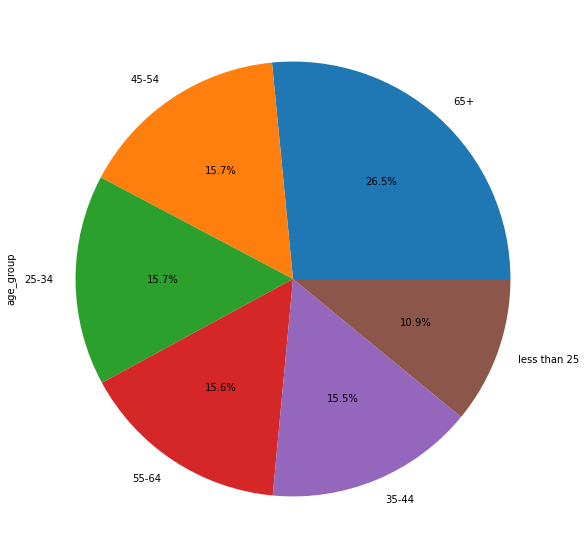

In [35]:
# Age groups distribution
pie_age=df_unique_cust['age_group'].value_counts().plot.pie(figsize=(15,10),autopct='%1.1f%%')

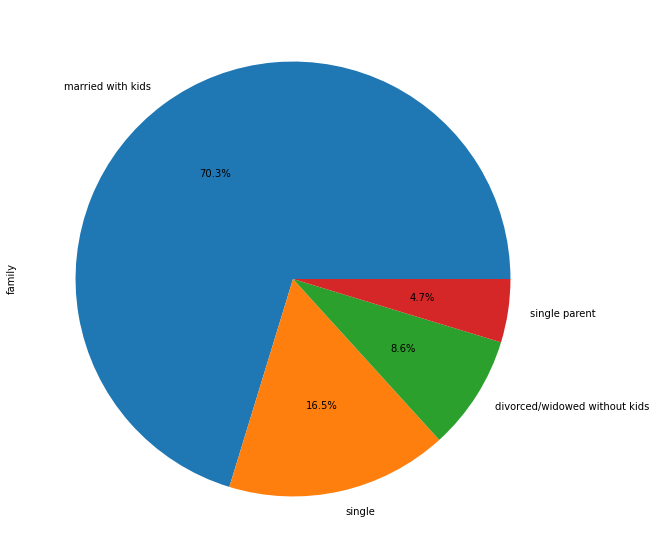

In [36]:
# Family status combined with number of kids distribution
pie_family=df_unique_cust['family'].value_counts().plot.pie(figsize=(15,10),autopct='%1.1f%%')

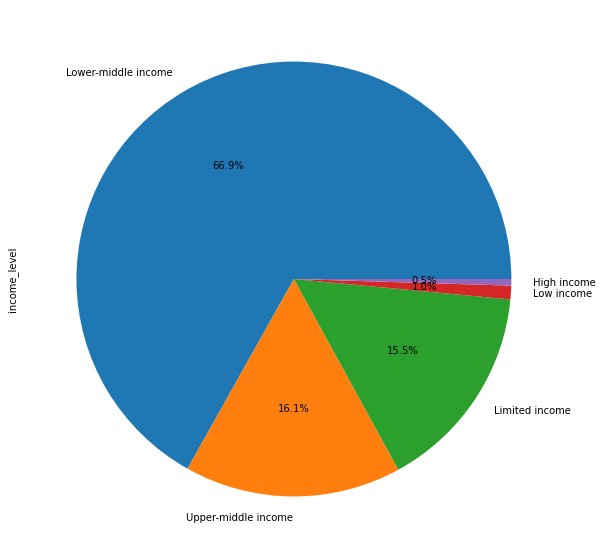

In [37]:
# Income level distribution
pie_income=df_unique_cust['income_level'].value_counts().plot.pie(figsize=(15,10),autopct='%1.1f%%')

In [38]:
# Export the charts
pie_income.figure.savefig(os.path.join(path, 'visualization', 'pie_income.png'))
pie_family.figure.savefig(os.path.join(path, 'visualization', 'pie_family.png'))
pie_age.figure.savefig(os.path.join(path, 'visualization', 'pie_age.png'))

FileNotFoundError: [Errno 2] No such file or directory: '/Users/elvachen/Documents/DA Learning/Immersion-data resources/visualization/pie_income.png'

# 4.10.7 Aggregate the max, mean, and min variables on a customer-profile level for usage frequency and expenditure

In [39]:
# Aggregate the max, mean, adn min of "days_since_prior_order" on customer profiles to indicate order frequency
df_ods_prds_cust.groupby(['age_group', 'family', 'income_level']).agg({'days_since_prior_order': ['min', 'mean', 'max']})

days_since_prior_order  \
                                                                                  min   
age_group    family                        income_level                                 
25-34        married with kids             High income                            0.0   
                                           Limited income                         0.0   
                                           Low income                             0.0   
                                           Lower-middle income                    0.0   
                                           Upper-middle income                    0.0   
             single                        High income                            0.0   
                                           Limited income                         0.0   
                                           Low income                             0.0   
                                           Lower-middle income                    0.0   
                                           Upper-middle income                    0.0   
35-44        married with kids             High income                            0.0   
                                           Limited income                         0.0   
                                           Low income                             0.0   
                                           Lower-middle income                    0.0   
                                           Upper-middle income                    0.0   
             single                        High income                            0.0   
                                           Limited income                         0.0   
                                           Low income                             0.0   
                                           Lower-middle income                    0.0   
                                           Upper-middle income                    0.0   
45-54        married with kids             High income                            0.0   
                                           Limited income                         0.0   
                                           Low income                             0.0   
                                           Lower-middle income                    0.0   
                                           Upper-middle income                    0.0   
             single                        High income                            0.0   
                                           Limited income                         0.0   
                                           Low income                             0.0   
                                           Lower-middle income                    0.0   
                                           Upper-middle income                    0.0   
55-64        divorced/widowed without kids High income                            0.0   
                                           Limited income                         0.0   
                                           Low income                             0.0   
                                           Lower-middle income                    0.0   
                                           Upper-middle income                    0.0   
             married with kids             High income                            0.0   
                                           Limited income                         0.0   
                                           Low income                             0.0   
                                           Lower-middle income                    0.0   
                                           Upper-middle income                    0.0   
             single                        High income                            0.0   
                                           Limited income                         0.0   
                                           Low income     

In [40]:
# Aggregate the max, mean, adn min of "prices" on customer profiles to indicate purchased price level 
df_ods_prds_cust.groupby(['age_group', 'family', 'income_level']).agg({'prices': ['min', 'mean', 'max']})

prices  \
                                                                  min   
age_group    family                        income_level                 
25-34        married with kids             High income            1.0   
                                           Limited income         1.0   
                                           Low income             1.0   
                                           Lower-middle income    1.0   
                                           Upper-middle income    1.0   
             single                        High income            1.0   
                                           Limited income         1.0   
                                           Low income             1.0   
                                           Lower-middle income    1.0   
                                           Upper-middle income    1.0   
35-44        married with kids             High income            1.0   
                                           Limited income         1.0   
                                           Low income             1.0   
                                           Lower-middle income    1.0   
                                           Upper-middle income    1.0   
             single                        High income            1.0   
                                           Limited income         1.0   
                                           Low income             1.0   
                                           Lower-middle income    1.0   
                                           Upper-middle income    1.0   
45-54        married with kids             High income            1.0   
                                           Limited income         1.0   
                                           Low income             1.0   
                                           Lower-middle income    1.0   
                                           Upper-middle income    1.0   
             single                        High income            1.0   
                                           Limited income         1.0   
                                           Low income             1.0   
                                           Lower-middle income    1.0   
                                           Upper-middle income    1.0   
55-64        divorced/widowed without kids High income            1.0   
                                           Limited income         1.0   
                                           Low income             1.0   
                                           Lower-middle income    1.0   
                                           Upper-middle income    1.0   
             married with kids             High income            1.0   
                                           Limited income         1.0   
                                           Low income             1.0   
                                           Lower-middle income    1.0   
                                           Upper-middle income    1.0   
             single                        High income            1.0   
                                           Limited income         1.0   
                                           Low income             1.0   
                                           Lower-middle income    1.0   
                                           Upper-middle income    1.0   
65+          divorced/widowed without kids High income            1.0   
                                           Limited income         1.0   
                                           Low income             1.0   
                                           Lower-middle income    1.0   
                                           Upper-middle income    1.0   
             married with kids             High income            1.0   
                                           Limited income         1.0   
                                           Low i

In [41]:
# Aggregate the max, mean, adn min of "order_sequency" on customer profiles to indicate how many orders were made
df_ods_prds_cust.groupby(['age_group', 'family', 'income_level']).agg({'order_sequency': ['min', 'mean', 'max']})

order_sequency  \
                                                                          min   
age_group    family                        income_level                         
25-34        married with kids             High income                      1   
                                           Limited income                   1   
                                           Low income                       1   
                                           Lower-middle income              1   
                                           Upper-middle income              1   
             single                        High income                      1   
                                           Limited income                   1   
                                           Low income                       1   
                                           Lower-middle income              1   
                                           Upper-middle income              1   
35-44        married with kids             High income                      1   
                                           Limited income                   1   
                                           Low income                       1   
                                           Lower-middle income              1   
                                           Upper-middle income              1   
             single                        High income                      1   
                                           Limited income                   1   
                                           Low income                       1   
                                           Lower-middle income              1   
                                           Upper-middle income              1   
45-54        married with kids             High income                      1   
                                           Limited income                   1   
                                           Low income                       1   
                                           Lower-middle income              1   
                                           Upper-middle income              1   
             single                        High income                      1   
                                           Limited income                   1   
                                           Low income                       1   
                                           Lower-middle income              1   
                                           Upper-middle income              1   
55-64        divorced/widowed without kids High income                      1   
                                           Limited income                   1   
                                           Low income                       1   
                                           Lower-middle income              1   
                                           Upper-middle income              1   
             married with kids             High income                      1   
                                           Limited income                   1   
                                           Low income                       1   
                                           Lower-middle income              1   
                                           Upper-middle income              1   
             single                        High income                      1   
                                           Limited income                   1   
                                           Low income                       1   
                                           Lower-middle income              1   
                                           Upper-middle income              1   
65+          divorced/widowed without kids High income                      1   
                                           Limited income                   1   
             

### After use "to_clipboard" to respectively paste above results on Excel to further analyze. The result showed above purchased behaviors is more related to income level, rather than age groups and family status. It means, the high income customers have, the higher purchased frequency/prices and the more orders they made. See the visulization as below.

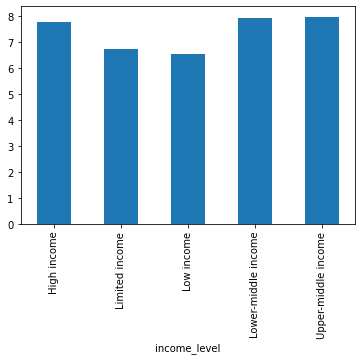

In [42]:
# Income level & high-price spenders (y axis represents the average price of items the customer group purchased)
bar_high_price=df_ods_prds_cust.groupby(['income_level'])['prices'].mean().plot.bar()

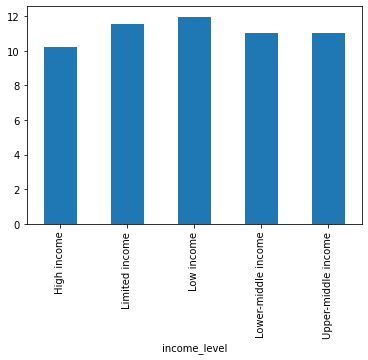

In [43]:
# Income level & order frequency (y axis represents the average interval(days) before the customer group placed next order)
bar_order_frequency=df_ods_prds_cust.groupby(['income_level'])['days_since_prior_order'].mean().plot.bar()

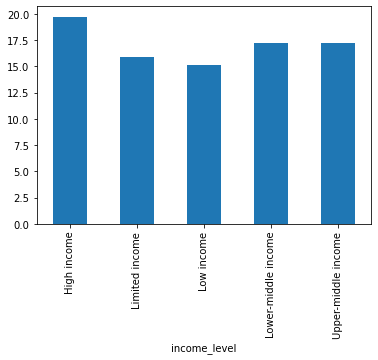

In [44]:
# Income level & order quantities (y axis represents the average order quantities the customer group made)
bar_order_quantity=df_ods_prds_cust.groupby(['income_level'])['order_sequency'].mean().plot.bar()

In [45]:
# Export the charts as png 
bar_order_frequency.figure.savefig(os.path.join(path, 'visualization', 'order_frequency.png'))
bar_high_price.figure.savefig(os.path.join(path, 'visualization', 'high_price.png'))
bar_order_quantity.figure.savefig(os.path.join(path, 'visualization', 'order_quantity.png'))

FileNotFoundError: [Errno 2] No such file or directory: '/Users/elvachen/Documents/DA Learning/Immersion-data resources/visualization/order_frequency.png'

# 4.10.8 Compare your customer profiles with regions and departments

In [ ]:
# import departments information to get deprtments' names
df_dept = pd.read_csv(os.path.join(path, 'prepared data', 'departments_wrangled.csv'))
df_dept.head()

In [ ]:
# Merge department dataframe with original dataframe to have departments' names
df_ods_prds_cust=df_ods_prds_cust.merge(df_dept, on = ['department_id'])
df_ods_prds_cust.head()

In [ ]:
# Calculate to compare "income_level" with regions and departments. According to the analysis conclusion of 4.10.7, only use "income_level" as customer-profile to analyze here.
df_rg_ic_dept=df_ods_prds_cust.groupby(['region', 'income_level', 'department'])['user_id'].count()
df_rg_ic_dept

In [ ]:
# Copy to Excel to further analyze
df_rg_ic_dept.to_clipboard()

### After analyzed on Excel, the proportions of orders (from different income levels) in different departments are almost the same among different regions. The data can't tell different customer-behaviors across the regions. 

# 4.10.9 Produce suitable charts to illustrate your results and export them in your project folder

In [ ]:
# Import the result data from csv file
df_region_behavior = pd.read_csv(os.path.join(path, 'prepared data', 'region_behavior_410.csv'))
df_region_behavior.head()

In [ ]:
# Proportion of orders in different departments in West
df_west=df_region_behavior[df_region_behavior['region']=='West']
bar_west=df_west.groupby(['department'])['proportion_of_current_region'].sum().plot.bar()

In [ ]:
# Proportion of orders in different departments in South
df_south=df_region_behavior[df_region_behavior['region']=='South']
bar_south=df_south.groupby(['department'])['proportion_of_current_region'].sum().plot.bar()

In [ ]:
# Proportion of orders in different departments in Midwest
df_midwest=df_region_behavior[df_region_behavior['region']=='Midwest']
bar_midwest=df_midwest.groupby(['department'])['proportion_of_current_region'].sum().plot.bar()

In [ ]:
# Proportion of orders in different departments in Northeast
df_northeast=df_region_behavior[df_region_behavior['region']=='Northeast']
bar_northeast=df_northeast.groupby(['department'])['proportion_of_current_region'].sum().plot.bar()

Above four bar charts respectively represent the proportions of orders in different departments from four regions. They show almost the same patterns mean they have the same proportions of orders from the departments.

In [ ]:
# Export the charts as png 
bar_west.figure.savefig(os.path.join(path, 'visualization', 'dept_west.png'))
bar_south.figure.savefig(os.path.join(path, 'visualization', 'dept_south.png'))
bar_midwest.figure.savefig(os.path.join(path, 'visualization', 'dept_midwest.png'))
bar_northeast.figure.savefig(os.path.join(path, 'visualization', 'dept_northeast.png'))

# 4.10.10 Tidy up your script, export your final data set, and save your notebook

In [ ]:
# Export latest dataframe to pickle file
df_ods_prds_cust.to_pickle(os.path.join(path, 'Prepared Data', 'ods_prds_cust_410.pkl'))

In [ ]:
bar_region_beha=df_ods_prds_cust.groupby(['region'])['prices'].mean().plot.bar()